In [29]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics

import sys

try:
    del sys.modules['results_analisys.utils']
except:
    pass

from results_analisys.utils import *

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
sns.set(font_scale=2)

# 2 groups

In [62]:
specific_file = '/Users/danielablin/Documents/GitHub/Thesis/test_run_2023-02-06_129_10000_2.pickle'
#specific_file = '/Users/danielablin/Documents/GitHub/Thesis/test_run_1000_2_2023-02-23 23:57:23.808168.pickle'
base = parse_test(specific_file, 2)

In [63]:
base.groupby(['best_sol', 'msg_sol'])['best_sol'].count()

best_sol      msg_sol       
cost_sol      found solution    1433
cost_sol_gov  found solution    8567
Name: best_sol, dtype: int64

<AxesSubplot:xlabel='Old Cost of Infection', ylabel='Young Cost of Infection'>

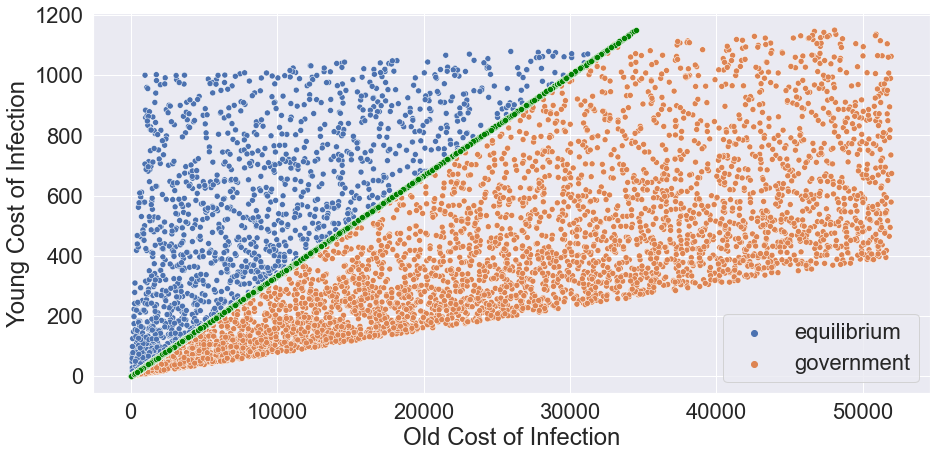

In [64]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)

test = rename_cols(base, 30, 2)

sns.scatterplot(data=test, x='Old Cost of Infection', y='Young Cost of Infection', hue='Lowest Cost')
sns.scatterplot(data=test, x='factor', y='Young Cost of Infection', color='green')

# 3 groups

In [68]:
specific_file = '/Users/danielablin/Documents/GitHub/Thesis/test_run_1000_3_2023-02-24 18:37:48.444126.pickle'
base = parse_test(specific_file, 3)

In [69]:
base.groupby('best_sol')['best_sol'].count()

best_sol
cost_sol        133
cost_sol_gov    867
Name: best_sol, dtype: int64

<AxesSubplot:xlabel='Old Cost of Infection', ylabel='Young Cost of Infection'>

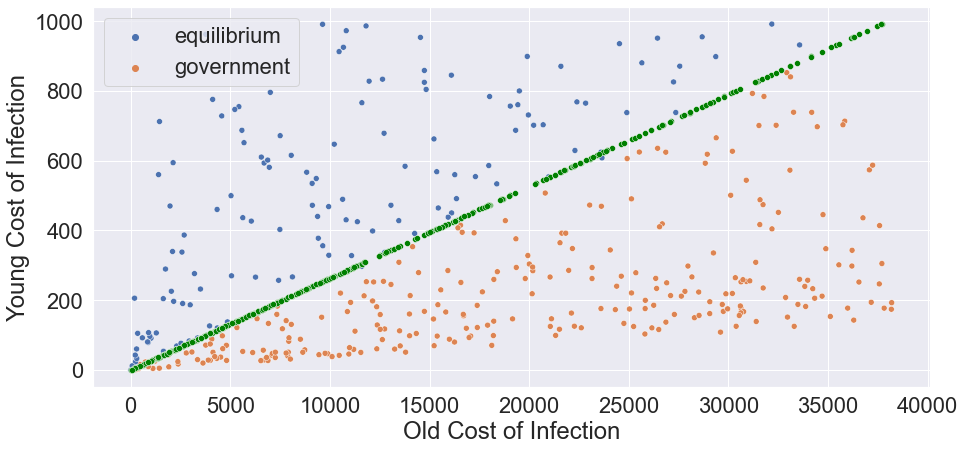

In [70]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)

test = rename_cols(base, 38, 3)

sns.scatterplot(data=test, x='Old Cost of Infection', y='Young Cost of Infection', hue='Lowest Cost')
sns.scatterplot(data=test, x='factor', y='Young Cost of Infection', color='green')

# 4 groups

In [36]:
specific_file = '/Users/danielablin/Documents/GitHub/Thesis/test_run_2023-02-10_129_10000_4.pickle'
base = parse_test(specific_file)

In [37]:
base.groupby('best_sol')['best_sol'].count()

best_sol
cost_sol        1065
cost_sol_gov    8935
Name: best_sol, dtype: int64

<AxesSubplot:xlabel='Old Cost of Infection', ylabel='Young Cost of Infection'>

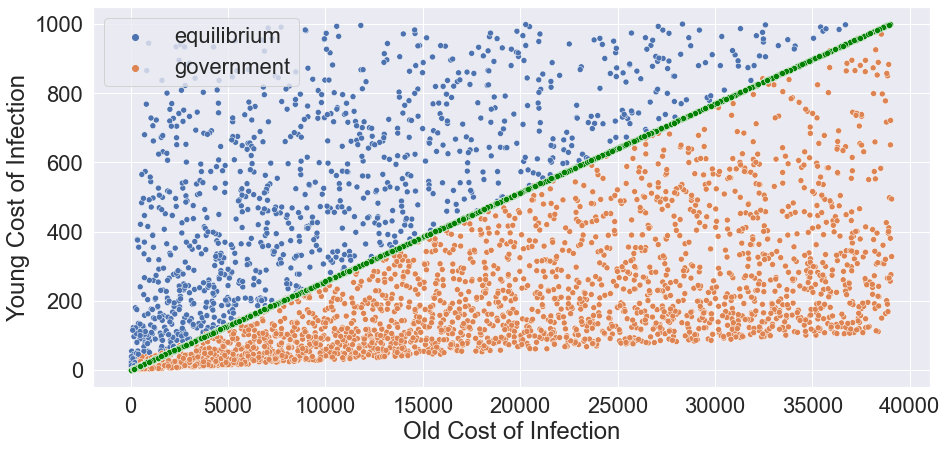

In [39]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)

test = rename_cols(base, 39, 4)

sns.scatterplot(data=test, x='Old Cost of Infection', y='Young Cost of Infection', hue='Lowest Cost')
sns.scatterplot(data=test, x='factor', y='Young Cost of Infection', color='green')

# 2 groups moving d

In [46]:
specific_file = '/Users/danielablin/Documents/GitHub/Thesis/test_run_25_2_2023-03-04 19:35:05.178972.pickle'
base = parse_test(specific_file, 2)
temp_l = pd.DataFrame(base['risk_l'].to_list())
base['risk rate'] = round(temp_l[1]/temp_l[0], 3)
parse_col(base, 'd', 4, [11, 12, 21, 22])
base['connection rate'] = base['d_12']/(base['d_11'] + base['d_12'])
#base['sol_gap'] = (base['sol_gap']*10).clip(-1,1)
base['POA'] = base['cost_sol'] / base['cost_sol_gov']

In [47]:
base['risk_l'] = base['risk_l'].astype(str)
base.query('pre <= 0.5').groupby(['cat', 'best_sol', 'risk_l'])['cat'].count()

UndefinedVariableError: name 'pre' is not defined

In [68]:
risks_to_show = [3.943, 7.010, 11.079, 20.820]

In [71]:
base[base['risk rate'].isin(risks_to_show)]

,T,I0,d,l,contagiousness,time,v_sol,v_der_sol,cost_sol,msg_sol,S_sol,test_results.solution_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,S_sol_gov,test_results.solution_sol_gov,sol_gap,best_sol,groups,d_11,d_12,d_21,d_22,l_1,l_2,v_sol_1,v_sol_2,S_sol_1,S_sol_2,S_sol_gov_1,S_sol_gov_2,risk rate,pre,POA
175,547,0.0001,"[[8.507906914600001, 0.0], [0.0, 2.44009137908...","[0.08096976914105891, 1.6857770445419205]",1,46.550400,"[[0.16145216685492497], [0.2556677990645222]]","[[-6.394884621840902e-14], [8.645173465993139e...",8.801143,found solution,"[[0.49828776143552717], [0.9291176670807101]]",True,0.164932,"[[35.580341283916475], [-35.580341283916255]]",10.655347,found solution,"[[0.3991984609812791], [0.9984041502706783]]",True,-1.854204,cost_sol,2,8.507907,0.000000,0.000000,2.440091,0.080970,1.685777,0.161452,0.255668,0.498288,0.929118,0.399198,0.998404,20.820,0.000000,0.825984
176,547,0.0001,"[[8.167590638016001, 0.09760365516333334], [0....","[0.08096976914105891, 1.6857770445419205]",1,57.584053,"[[0.16418489618639304], [0.24279891337159654]]","[[2.8492763703980017e-12], [-1.459845577755913...",9.233409,found solution,"[[0.49846774670313176], [0.8577612069006698]]",True,0.166732,"[[18.849938677011806], [-18.849938677011984]]",10.624625,found solution,"[[0.437989120850349], [0.9484986909833399]]",True,-1.391217,cost_sol,2,8.167591,0.097604,0.340316,2.342488,0.080970,1.685777,0.164185,0.242799,0.498468,0.857761,0.437989,0.948499,20.820,0.011809,0.869057
177,547,0.0001,"[[7.827274361432002, 0.1952073103266667], [0.6...","[0.08096976914105891, 1.6857770445419205]",1,62.397703,"[[0.16701932030081523], [0.23046583824344588]]","[[3.524291969370097e-12], [-9.790603883175208e...",9.592647,found solution,"[[0.49956288098831064], [0.8139766881988784]]",True,0.168111,"[[3.5715634060729826], [-3.571563406073043]]",10.599910,found solution,"[[0.48928802738324173], [0.9116065817875055]]",True,-1.007263,cost_sol,2,7.827274,0.195207,0.680633,2.244884,0.080970,1.685777,0.167019,0.230466,0.499563,0.813977,0.489288,0.911607,20.820,0.024333,0.904974
178,547,0.0001,"[[7.486958084848002, 0.29281096549], [1.020948...","[0.08096976914105891, 1.6857770445419205]",1,63.082694,"[[0.1700024399546973], [0.21910438361335785]]","[[5.9117155615240335e-12], [-1.116866599204513...",9.903606,found solution,"[[0.5010977275476152], [0.7835574233517074]]",True,0.169168,"[[-8.106320595785704], [8.106320595786066]]",10.569334,found solution,"[[0.5483495163246689], [0.8877329978299526]]",True,-0.665728,cost_sol,2,7.486958,0.292811,1.020949,2.147280,0.080970,1.685777,0.170002,0.219104,0.501098,0.783557,0.548350,0.887733,20.820,0.037637,0.937013
179,547,0.0001,"[[7.146641808264002, 0.3904146206533334], [1.3...","[0.08096976914105891, 1.6857770445419205]",1,63.643281,"[[0.17316936012714348], [0.20859397874716268]]","[[1.234212732015294e-11], [-7.100631194134621e...",10.184694,found solution,"[[0.5029152827686213], [0.7605851587474635]]",True,0.170116,"[[-15.819425923381804], [15.819425923381871]]",10.525463,found solution,"[[0.6069702914436216], [0.8736303581087155]]",True,-0.340769,cost_sol,2,7.146642,0.390415,1.361265,2.049677,0.080970,1.685777,0.173169,0.208594,0.502915,0.760585,0.606970,0.873630,20.820,0.051799,0.967624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,547,0.0001,"[[1.701581382920003, 1.952073103266666], [6.80...","[1.1998641350930765, 7.057990490390145]",1,60.951189,"[[0.257996493867095], [0.10544182571240292]]","[[-9.682157298129823e-10], [4.5787373892380856...",20.422642,found solution,"[[0.8884712461219493], [0.8768723427595078]]",True,0.173905,"[[-26.089864442413425], [26.08986444241353]]",17.006240,found solution,"[[0.9661456200483871], [0.9468581708122211]]",True,3.416403,cost_sol_gov,2,1.701581,1.952073,6.806326,0.488018,1.199864,7.057990,0.257996,0.105442,0.888471,0.876872,0.966146,0.946858,5.882,0.534280,1.200891
471,547,0.0001,"[

In [48]:
list(base['risk rate'].unique())

[9.9, 4.609]

In [50]:
base

,T,risk_l,d,time,v_sol,v_der_sol,cost_sol,msg_sol,test_results_sol,S_sol,I_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,test_results_sol_gov,S_sol_gov,I_sol_gov,sol_gap,best_sol,risk_l_1,risk_l_2,v_sol_1,v_sol_2,S_sol_1,S_sol_2,S_sol_gov_1,S_sol_gov_2,risk rate,d_11,d_12,d_21,d_22,connection rate,POA
0,1701,[ 655.92133897 6493.89718796],"[[0.5, 0.0], [0.0, 0.14340139141014885]]",658.173972,"[[0.6111173905877154], [0.8004062321421741]]","[[2.5011104298755527e-12], [-1.705302565824240...",7638.057782,found solution,True,"[[0.9803758099492936], [0.9995774329797193]]","[[0.019624190050706324], [0.0004225670202836208]]",0.633144,"[[737.8954512049959], [-471.27714294115674]]",7674.660887,time out,None,"[[0.9662546161965806], [0.9998958030439431]]","[[0.03374538380341943], [0.00010419695605622346]]",-36.603105,cost_sol,655.921339,6493.897188,0.611117,0.800406,0.980376,0.999577,0.966255,0.999896,9.900,0.50,0.00,0.000000,0.143401,0.00,0.995231
1,1701,[ 655.92133897 6493.89718796],"[[0.48, 0.005736055656405954], [0.02, 0.137665...",24.364573,"[[0.618974735729521], [0.753532230461637]]","[[-5.684341886080801e-13], [2.7000623958883807...",7653.959072,found solution,True,"[[0.9819098537884593], [0.9981726947466487]]","[[0.018090146211540956], [0.0018273052533505205]]",0.625271,"[[154.29175662475063], [-145.2331789000005]]",7681.154539,found solution,False,"[[0.9792146299145348], [0.9986889031112725]]","[[0.02078537008546467], [0.0013110968887279088]]",-27.195467,cost_sol,655.921339,6493.897188,0.618975,0.753532,0.981910,0.998173,0.979215,0.998689,9.900,0.48,0.02,0.005736,0.137665,0.04,0.996459
2,1701,[ 655.92133897 6493.89718796],"[[0.45999999999999996, 0.011472111312811908], ...",24.268893,"[[0.627009302589388], [0.7279245499749728]]","[[3.979039320256561e-12], [-6.536993168992922e...",7665.219845,found solution,True,"[[0.9833374828335455], [0.9971161737895119]]","[[0.01666251716645416], [0.0028838262104865313]]",0.625009,"[[-46.975140859093756], [44.2171972467014]]",7683.505275,found solution,True,"[[0.9844061795958157], [0.9980214382201086]]","[[0.015593820404185745], [0.001978561779890586]]",-18.285430,cost_sol,655.921339,6493.897188,0.627009,0.727925,0.983337,0.997116,0.984406,0.998021,9.900,0.46,0.04,0.011472,0.131929,0.08,0.997620
3,1701,[ 655.92133897 6493.89718796],"[[0.43999999999999995, 0.017208166969217863], ...",33.861827,"[[0.6352181521421455], [0.7109738386318816]]","[[-1.1027623258996755e-11], [8.822098607197404...",7673.626024,found solution,True,"[[0.9846539808924433], [0.9962809863771239]]","[[0.015346019107556971], [0.0037190136228766922]]",0.626178,"[[-162.48977125282312], [152.94988231417778]]",7683.134665,found solution,True,"[[0.9878008911919696], [0.9976204482401787]]","[[0.012199108808030282], [0.0023795517598216094]]",-9.508642,cost_sol,655.921339,6493.897188,0.635218,0.710974,0.984654,0.996281,0.987801,0.997620,9.900,0.44,0.06,0.017208,0.126193,0.12,0.998762
4,1701,[ 655.92133897 6493.89718796],"[[0.41999999999999993, 0.022944222625623817], ...",69.294561,"[[0.6436081139109737], [0.6983847185227288]]","[[-1.7621459846850485e-12], [2.557953848736360...",7679.982761,found solution,True,"[[0.9858659696090529], [0.9956138362868103]]","[[0.014134030390945958], [0.0043861637131898295]]",0.628234,"[[-231.09465298749376], [217.526923112526]]",7681.112223,found solution,True,"[[0.9901860889788703], [0.9973732864518161]]","[[0.009813911021130781], [0.0026267135481827224]]",-1.129462,cost_sol,655.921339,6493.897188,0.643608,0.698385,0.985866,0.995614,0.990186,0.997373,9.900,0.42,0.08,0.022944,0.120457,0.16,0.999853
5,1701,[ 655.92133897 6493.89718796],"[[0.3999999999999999, 0.02868027828202977], [0...",41.725048,"[[0.6521883264315925], [0.6883224435138316]]","[[-2.1600499167107046e-12], [5.115907697472721...",7684.764536,found solution,True,"[[0.9869816539253992], [0.9950830532926447]]","[[0.013018346074598845], [0.004916946707356784]]",0.630864,"[[-271.5922055937515], [255.64683587584216]]",7678.082821,found solut

/var/folders/xq/smdsq3l138q1rrzfcbmdr9w80000gn/T/ipykernel_87371/3564294452.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['risk rate'] = round(test['risk rate'])
/var/folders/xq/smdsq3l138q1rrzfcbmdr9w80000gn/T/ipykernel_87371/3564294452.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels, fontsize=18)


<AxesSubplot:xlabel='connection rate', ylabel='POA'>

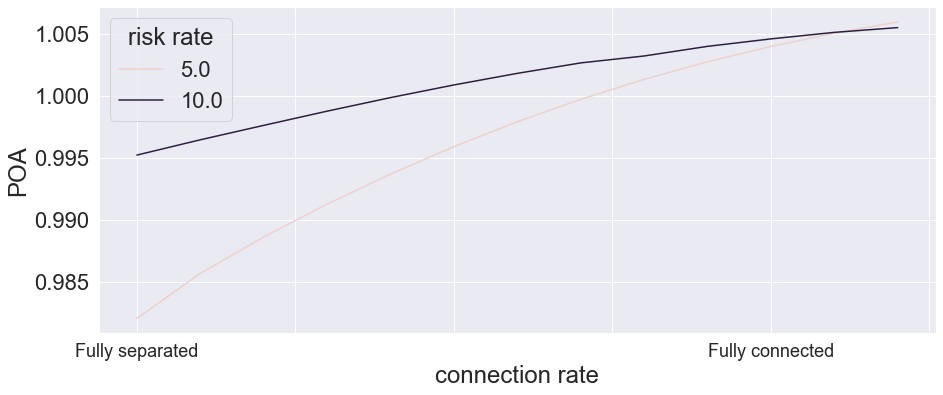

In [49]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
risks_to_show = [9.9, 4.609]
x_ticks_labels = ['', 'Fully separated', '', '', '', 'Fully connected']

test = base[base['risk rate'].isin(risks_to_show) & (base['connection rate'] <= 0.5)]
test['risk rate'] = round(test['risk rate'])

ax.set_xticklabels(x_ticks_labels, fontsize=18)

sns.lineplot(data=test, x='connection rate', y='POA', hue='risk rate')

/var/folders/xq/smdsq3l138q1rrzfcbmdr9w80000gn/T/ipykernel_87371/3564294452.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['risk rate'] = round(test['risk rate'])
/var/folders/xq/smdsq3l138q1rrzfcbmdr9w80000gn/T/ipykernel_87371/3564294452.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels, fontsize=18)


<AxesSubplot:xlabel='connection rate', ylabel='POA'>

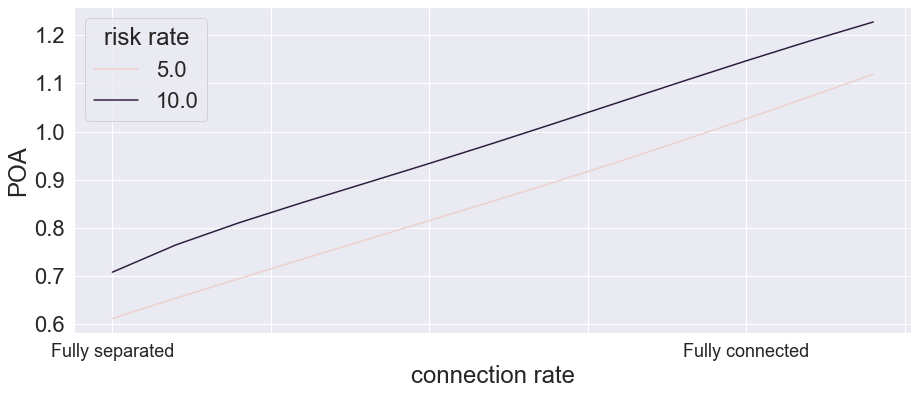

In [45]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
risks_to_show = [9.9, 4.609]
x_ticks_labels = ['', 'Fully separated', '', '', '', 'Fully connected']

test = base[base['risk rate'].isin(risks_to_show) & (base['connection rate'] <= 0.5)]
test['risk rate'] = round(test['risk rate'])

ax.set_xticklabels(x_ticks_labels, fontsize=18)

sns.lineplot(data=test, x='connection rate', y='POA', hue='risk rate')

In [43]:
base

,T,risk_l,d,time,v_sol,v_der_sol,cost_sol,msg_sol,test_results_sol,S_sol,I_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,test_results_sol_gov,S_sol_gov,I_sol_gov,sol_gap,best_sol,risk_l_1,risk_l_2,v_sol_1,v_sol_2,S_sol_1,S_sol_2,S_sol_gov_1,S_sol_gov_2,risk rate,d_11,d_12,d_21,d_22,connection rate,POA
0,547,"[655.9213389665696, 6493.897187961923]","[[8.507906914600001, 0.0], [0.0, 2.44009137908...",13.032392,"[[0.3236746653861881], [0.4796329145689634]]","[[-1.0477378964424133e-09], [-2.72848410531878...",11080.528255,found solution,True,"[[0.4852214341307887], [0.985313927423242]]","[[0.5147785658692109], [0.014686072576757352]]",0.323675,"[[1.0186340659856796e-09], [-205085.54691162283]]",11080.528255,found solution,False,"[[0.48522143413078717], [0.9997179890199811]]","[[0.5147785658692123], [0.00028201098001920134]]",-5.456968e-12,cost_sol,655.921339,6493.897188,0.323675,0.479633,0.485221,0.985314,0.485221,0.999718,9.900,8.507907,0.000000,0.000000,2.440091,0.00,1.000000
1,547,"[655.9213389665696, 6493.897187961923]","[[8.167590638016001, 0.09760365516333334], [0....",24.483034,"[[0.32860772994773235], [0.44244833493215274]]","[[-3.725290298461914e-09], [5.402398528531194e...",12377.389831,found solution,True,"[[0.5027283590065625], [0.9118774782744254]]","[[0.4972716409934367], [0.08812252172557491]]",0.330386,"[[39086.981015042315], [-136285.22230738917]]",13961.957176,found solution,False,"[[0.4785214755019309], [0.9551991769864211]]","[[0.5214785244980703], [0.04480082301357854]]",-1.584567e+03,cost_sol,655.921339,6493.897188,0.328608,0.442448,0.502728,0.911877,0.478521,0.955199,9.900,8.167591,0.340316,0.097604,2.342488,0.04,0.886508
2,547,"[655.9213389665696, 6493.897187961923]","[[7.827274361432002, 0.1952073103266667], [0.6...",26.010388,"[[0.3336194135264688], [0.4232310481929983]]","[[2.1827872842550278e-09], [-8.440110832452774...",11690.340715,found solution,True,"[[0.5205197028627527], [0.866134626354148]]","[[0.47948029713724727], [0.133865373645851]]",0.335232,"[[22871.01624462547], [-79744.7501022186]]",12830.634420,found solution,False,"[[0.5066516190785253], [0.9168180441480164]]","[[0.49334838092147615], [0.08318195585198412]]",-1.140294e+03,cost_sol,655.921339,6493.897188,0.333619,0.423231,0.520520,0.866135,0.506652,0.916818,9.900,7.827274,0.680633,0.195207,2.244884,0.08,0.911127
3,547,"[655.9213389665696, 6493.897187961923]","[[7.486958084848002, 0.29281096549], [1.020948...",24.481324,"[[0.3387189030444607], [0.41045083735819804]]","[[-2.270098775625229e-09], [7.312337402254343e...",11068.940250,found solution,True,"[[0.5383170043882282], [0.8327185850339472]]","[[0.46168299561177234], [0.16728141496605306]]",0.339941,"[[7831.719811540883], [-27306.986823951447]]",11853.842375,found solution,False,"[[0.5377919679676981], [0.8849548054888459]]","[[0.4622080320323025], [0.11504519451115486]]",-7.849021e+02,cost_sol,655.921339,6493.897188,0.338719,0.410451,0.538317,0.832719,0.537792,0.884955,9.900,7.486958,1.020949,0.292811,2.147280,0.12,0.933785
4,547,"[655.9213389665696, 6493.897187961923]","[[7.146641808264002, 0.3904146206533334], [1.3...",24.404793,"[[0.3439266048823494], [0.40067122631340585]]","[[1.6589183360338211e-09], [-4.401954356580972...",10512.018095,found solution,True,"[[0.5561066264676561], [0.8071343146354041]]","[[0.44389337353234404], [0.19286568536459503]]",0.344465,"[[-5420.5212369262445], [18899.820927897075]]",11010.323718,found solution,True,"[[0.571632657054523], [0.8597919909855221]]","[[0.428367342945478], [0.1402080090144785]]",-4.983056e+02,cost_sol,655.921339,6493.897188,0.343927,0.400671,0.556107,0.807134,0.571633,0.859792,9.900,7.146642,1.361265,0.390415,2.049677,0.16,0.954742
5,547,"[655.9213389665696, 6493.897187961923]","[[6.806325531680002, 0.48801827581666674], [1....",20.307138,"[[0.34926272141292763], [0.39259211878071126]]","[[-9.313225746154785e-10], [1.673470251262188e...",10013.767347,found solution,True,"[[0.573898239929366], [0.7871841398668709]]","[[0.4